In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color
import math


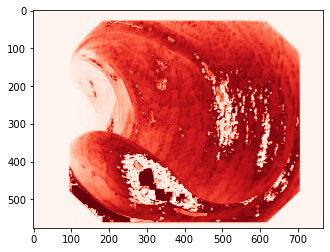

In [60]:
img = cv2.imread("WL (18).png")


(B,G,R)=cv2.split(img)
kernel = np.ones((12,12),np.uint8)
#traitement du R 



#stretching du R
original = R.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(R, table)

plt.imshow(R,cmap="Reds")

#tophat du R

tophatR = cv2.morphologyEx(R, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophatR,cmap="Reds")

#blackhat du r

blackhatR = cv2.morphologyEx(R, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhatR,cmap="Reds")

#combinaison 

resultat = original + tophatR
plt.imshow(resultat,cmap="Reds")

resultatf = resultat + blackhatR
plt.imshow(resultatf,cmap="Reds")

#filre median
imD=cv2.medianBlur(resultatf, 1)
plt.imshow(imD,cmap="Reds")


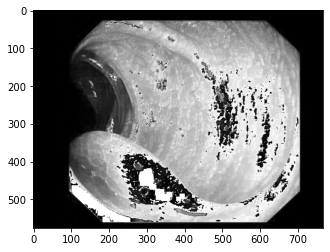

In [61]:
#stretching du R
originalB = B.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(B, table)

plt.imshow(B,cmap="Blues")

#tophat du R

tophatB = cv2.morphologyEx(B, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophatB,cmap="Blues")

#blackhat du r

blackhatB = cv2.morphologyEx(B, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhatB,cmap="Blues")

#combinaison 

resultatB = originalB + tophatB
plt.imshow(resultatB,cmap="Blues")

resultatfB = resultatB + blackhatR
plt.imshow(resultatf,cmap="Blues")

#filre median
imDB=cv2.medianBlur(resultatf, 1)
plt.imshow(imDB,cmap="gray")


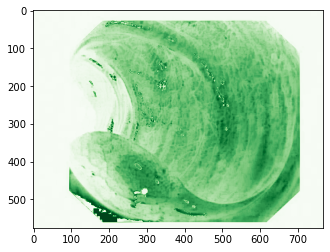

In [62]:
#stretching du R
originalG = G.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(G, table)

plt.imshow(G,cmap="Greens")

#tophat du R

tophatG = cv2.morphologyEx(G, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophatG,cmap="Greens")

#blackhat du r

blackhatG = cv2.morphologyEx(G, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhatG)

#combinaison 

resultatG = originalG + tophatG
plt.imshow(resultatG,cmap="Greens")

resultatfG = resultatG + blackhatG
plt.imshow(resultatfG,cmap="Greens")

#filre median
imDG=cv2.medianBlur(resultatfG, 1)
cv2.imshow("",imDG)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [63]:


final =(imD+imDG+imDB)
final = cv2.cvtColor(final,cv2.COLOR_GRAY2BGR)
final = cv2.cvtColor(final,cv2.COLOR_BGR2LAB)
cv2.imshow("",final)
cv2.waitKey(0)
cv2.destroyAllWindows()
ret,thresh1 = cv2.threshold(img,50,100,cv2.THRESH_BINARY)

INV = abs(thresh1-255)
INV = thresh1 * img

cv2.imshow("",INV)
cv2.waitKey(0)
cv2.destroyAllWindows()